## 데이터 전처리 및 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#os.chdir('./GitHub/seoul_metro_profit_analysis')
os.getcwd()

'c:\\Users\\jaeminiman\\Desktop\\workspace\\GitHub\\seoul_metro_profit_analysis'

In [6]:
csv_list = os.listdir(os.getcwd() + '/data')
csv_list

['data1.csv',
 'data2.csv',
 'data3.csv',
 '도시철도_총괄지표.csv',
 '무임승차_대상별_현황.csv',
 '서울교통공사_역간이용인원_211031.csv',
 '성_및_연령별_추계인구.csv',
 '승객_1인당_운임손실_현황.csv',
 '운영기관별_손익계산서.csv']

#### 문제확인

In [26]:
df1 = pd.read_csv(os.getcwd() + "//data//" + csv_list[0], header=0)

In [27]:
df1 = df1.iloc[:6,:]
df1

,년도,영업 수입 소계,운수사업수익,기타사업수익,소계,인건비,경비,영업 손익,영업외수익,영업외비용,경상 손익
0,2017,19673,16165,3508,24892,12911,11981,-5219,772,807,-5254
1,2018,19865,16234,3631,25187,12748,12439,-5322,1684,1751,-5389
2,2019,20046,16367,3679,25370,12602,12768,-5324,504,1045,-5865
3,2020,15595,11932,3663,26497,13551,12946,-10902,507,743,-11138
4,2021,16291,12542,3749,25676,12267,13409,-9385,511,770,-9644


In [35]:
plt.rcParams['font.family'] = 'Malgun Gothic'

Text(0.5, 1.0, '5년간의 서울교통공사 수익 및 지출액')

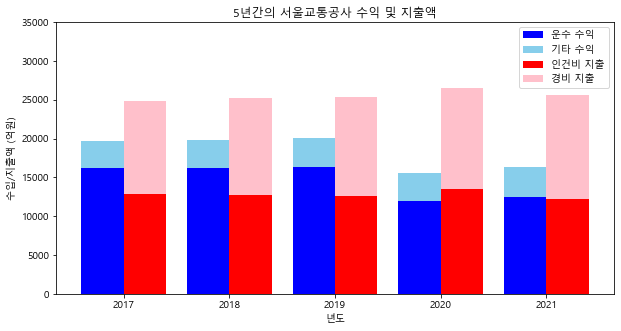

In [89]:
N = 5
ind = np.arange(N)
wid = 0.4

val1 = df1['운수사업수익']
val2 = df1['기타사업수익']
val3 = df1['인건비']
val4 = df1['경비']
val5 = df1['영업 손익'].apply(lambda x: -x)

plt.figure(figsize= (10, 5))

plt.bar(ind-wid/2, val1, width = wid, color = 'blue', label = "운수 수익")
plt.bar(ind-wid/2, val2, width = wid, color = 'skyblue', bottom=val1, label = "기타 수익" )
plt.bar(ind+wid/2, val3, width = wid, color = 'red', label = "인건비 지출")
plt.bar(ind+wid/2, val4, width = wid, color = 'pink', bottom = val3, label = "경비 지출")

plt.xticks(ind, df1['년도'])
plt.ylim((0, 35000))
plt.xlabel("년도")
plt.ylabel("수입/지출액 (억원)")
plt.legend()

plt.title("5년간의 서울교통공사 수익 및 지출액")


Text(0.5, 1.0, '5년간의 서울교통공사 적자규모')

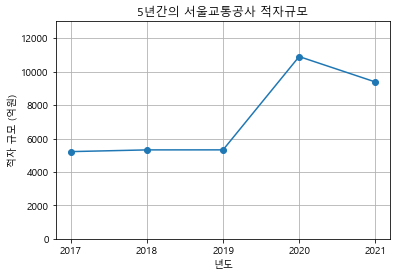

In [105]:
plt.plot(ind, val5, marker = 'o', linestyle = '-')

plt.xticks(ind, df1["년도"])
plt.ylim((0, 13000))

plt.xlabel("년도")
plt.ylabel("적자 규모 (억원)")
plt.grid()
plt.title("5년간의 서울교통공사 적자규모")


#### Q2. 코로나 이후에 지하철 이용객이 얼마만큼 회복될까?

In [5]:
csv_list[2]

'도시철도_총괄지표.csv'

In [16]:
df2 = pd.read_csv(os.getcwd() + "//data//" + csv_list[2], header=0)

In [17]:
df2.drop(index=[0,1,6], inplace=True)

In [37]:
df2

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
년도,,,,,,,,,,,,
2019,148714895.0,126659871.0,154724389.0,155889365.0,160219944.0,145998746.0,152744810.0,145822635.0,140556256.0,158443165.0,153754947.0,156190410.0
2020,138179972.0,114010716.0,94283830.0,99788802.0,109489199.0,114435630.0,121991623.0,102087178.0,95669906.0,111113503.0,113664422.0,92867972.0
2021,94814649.0,94918943.0,179361030.0,177362734.0,173318024.0,118019915.0,105452732.0,100842409.0,101521084.0,112732509.0,121232245.0,119231996.0
2022,109970614.0,93181145.0,106042539.0,118875309.0,130722993.0,123105166.0,125179373.0,120761862.0,NaN,NaN,NaN,NaN


In [31]:
df2.set_index(df2.columns[0], inplace=True)

In [44]:
12*3 +9

45

Text(12.4, 50000000.0, '코로나 확진자 발생')

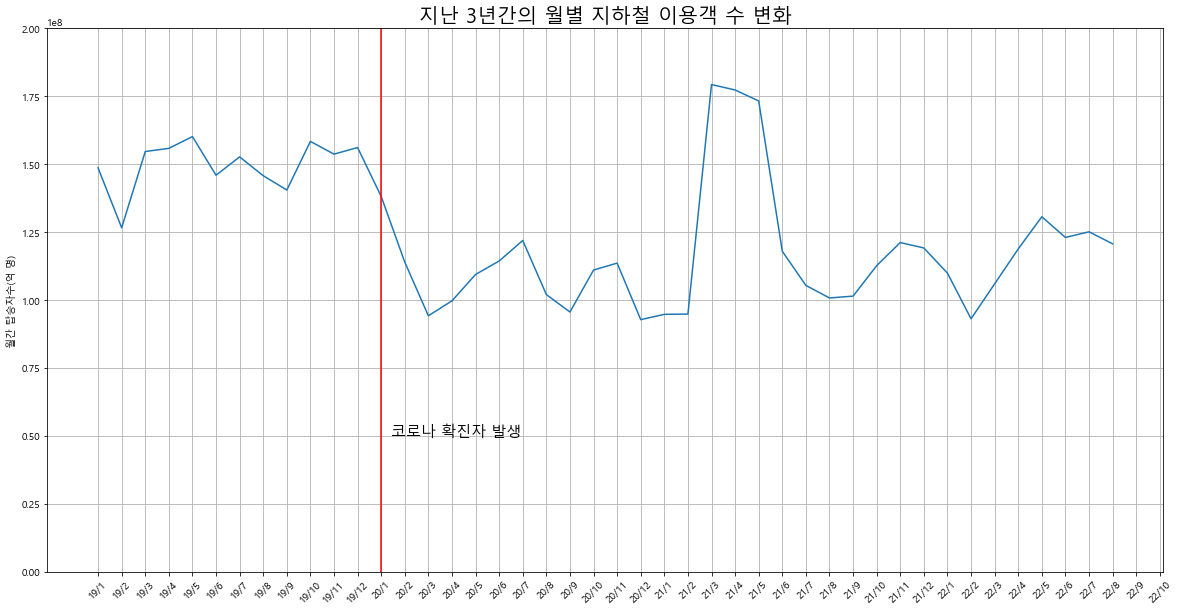

In [73]:
plt.figure(figsize=(20, 10))
plt.plot(df2.to_numpy().flatten())
plt.xticks(range(0,48), [str(k) + '/' + j for k in range(19, 23) for j in [ str(i) for i in range(1, 13)]], rotation=45)
plt.ylim((0, 2e8))
plt.ylabel('월간 탑승자수(억 명)')
plt.grid()
plt.title("지난 3년간의 월별 지하철 이용객 수 변화", size=20)
plt.vlines(x = 12, colors='red', ymin=0, ymax=2e8)
plt.text(x=12.4, y= 0.5e8, s='코로나 확진자 발생', size = 15)

In [43]:
[str(k) + '년' + j for k in range(2019, 2022) for j in [ str(i) + '월' for i in range(1, 13)]]

['2019년1월',
 '2019년2월',
 '2019년3월',
 '2019년4월',
 '2019년5월',
 '2019년6월',
 '2019년7월',
 '2019년8월',
 '2019년9월',
 '2019년10월',
 '2019년11월',
 '2019년12월',
 '2020년1월',
 '2020년2월',
 '2020년3월',
 '2020년4월',
 '2020년5월',
 '2020년6월',
 '2020년7월',
 '2020년8월',
 '2020년9월',
 '2020년10월',
 '2020년11월',
 '2020년12월',
 '2021년1월',
 '2021년2월',
 '2021년3월',
 '2021년4월',
 '2021년5월',
 '2021년6월',
 '2021년7월',
 '2021년8월',
 '2021년9월',
 '2021년10월',
 '2021년11월',
 '2021년12월']